# Hotdogs

TODO:
- Train/val split
    - Transforms also for validation
    - Standardize
- Clean up memory issues
- Transfer learning
    - Resnet
    - VGG

Post
- Test function 
    - Plot misclassification
- Saliency maps

In [1]:
import os
if os.getcwd().split("/")[-1] != "hotdog":
    os.chdir('/work3/s183920/02514-DLCI/02514-Deep-Learning-In-Computer-Vision/hotdog/')

from classifier import HotdogClassifier
import torch

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
classifier = HotdogClassifier(num_epochs=3, model = "NewCNN")
classifier.train(cuda_device=1)

## Data loader

In [26]:
classifier = HotdogClassifier(num_epochs=3, model = "LukasCNN", use_wandb=False)

train_idx = classifier.train_loader.dataset.indices
train_labels = [classifier.train_loader.dataset.dataset.targets[i] for i in train_idx]

val_idx = classifier.val_loader.dataset.indices
val_labels = [classifier.val_loader.dataset.dataset.targets[i] for i in val_idx]

test_labels = classifier.test_loader.dataset.targets

print("Train total: ", len(classifier.data_train))
print("Train total not hotdogs: ", sum(classifier.data_train.targets), "(", sum(classifier.data_train.targets)/len(classifier.data_train.targets), ")")
print("Train total hotdogs: ", len(classifier.data_train.targets) - sum(classifier.data_train.targets), f"({(len(classifier.data_train.targets) - sum(classifier.data_train.targets))/len(classifier.data_train.targets)})")
print()
print("Train: ", len(train_labels))
print("Train not hotdogs: ", sum(train_labels), "(", sum(train_labels)/len(train_labels), ")")
print("Train hotdogs: ", len(train_labels) - sum(train_labels), f"({(len(train_labels) - sum(train_labels))/len(train_labels)})")
print()
print("Val: ", len(val_labels))
print("Val not hotdogs: ", sum(val_labels), "(", sum(val_labels)/len(val_labels), ")")
print("Val hotdogs: ", len(val_labels) - sum(val_labels), f"({(len(val_labels) - sum(val_labels))/len(val_labels)})")
print()
print("Test: ", len(test_labels))
print("Test not hotdogs: ", sum(test_labels), "(", sum(test_labels)/len(test_labels), ")")
print("Test hotdogs: ", len(test_labels) - sum(test_labels), f"({(len(test_labels) - sum(test_labels))/len(test_labels)})")

Train total:  2047
Train total not hotdogs:  972 ( 0.4748412310698583 )
Train total hotdogs:  1075 (0.5251587689301417)

Train:  1638
Train not hotdogs:  770 ( 0.4700854700854701 )
Train hotdogs:  868 (0.5299145299145299)

Val:  409
Val not hotdogs:  202 ( 0.4938875305623472 )
Val hotdogs:  207 (0.5061124694376528)

Test:  1862
Test not hotdogs:  967 ( 0.5193340494092373 )
Test hotdogs:  895 (0.4806659505907626)


409

In [2]:
from dataloader import HotdogDataset
test_loader = HotdogDataset(train = False)
# test_loader.subset_data(range(100))
# .get_dataloader(batch_size=32, shuffle=False)
len(test_loader)

1862

(array([895.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 967.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

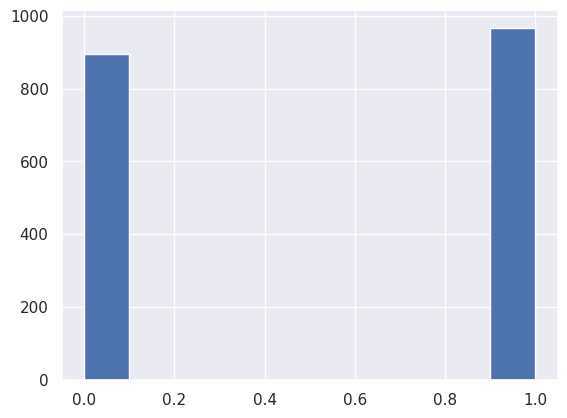

In [3]:
labels = [test_loader[i][1] for i in range(len(test_loader))]
# plt.hist(labels)

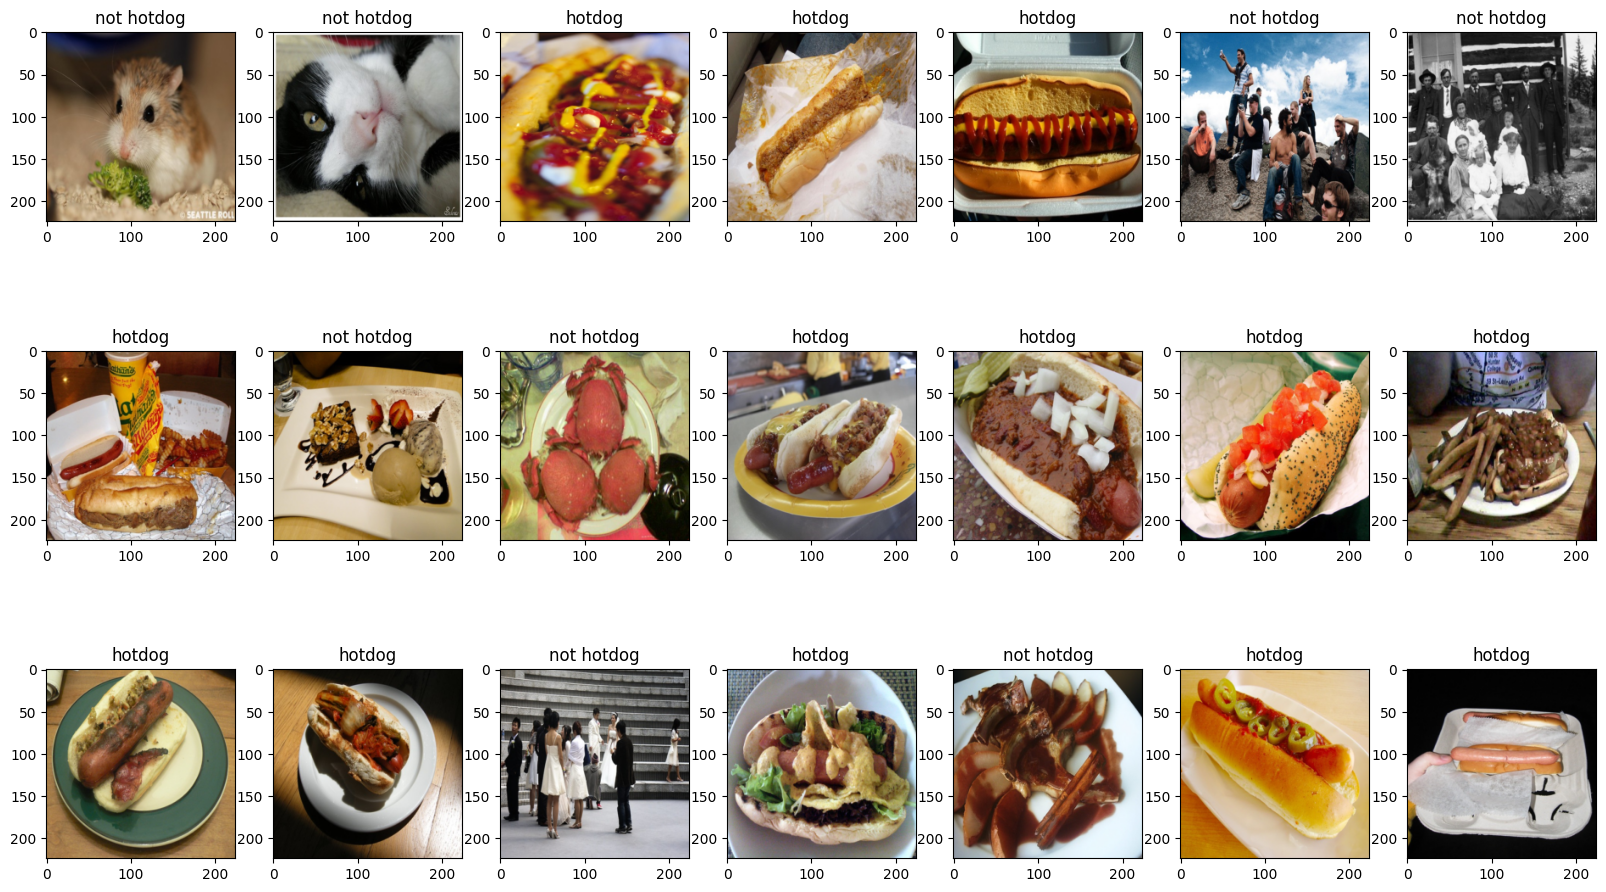

In [2]:
from dataloader import HotdogDataset
import matplotlib.pyplot as plt

data_train = HotdogDataset()
images, labels = next(iter(data_train.get_dataloader(batch_size=21, shuffle=True)))
plt.figure(figsize=(20,20))
for i in range(21):
    plt.subplot(5,7,i+1)
    plt.imshow(images[i].numpy().transpose(1,2,0))
    plt.title(['hotdog', 'not hotdog'][labels[i].item()])

## Model outputs

In [2]:
class HotdogClassifier(HotdogClassifier):
    def test(self):        
        if self.verbose:
            print("Testing model...")
        
        # Init counters
        test_correct = 0
        test_loss = 0
        
        # conf matrix
        true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0
        
        # Test the model
        self.model.eval()
        for data, target in self.test_loader:
            data = data.to(self.device)
            with torch.no_grad():
                output = self.model(data)
            predicted = output.argmax(1).cpu()
            
            # Update counters
            test_correct += (target==predicted).sum().item()
            test_loss += self.loss_fun(output.cpu(), target).item()
            
            # calculate confusion matrix
            tp, tn, fp, fn = self.calculate_confusion_matrix(target, predicted)
            true_positive += tp
            true_negative += tn
            false_positive += fp
            false_negative += fn
            
        # compute stats
        len_test = len(self.data_test)        
        test_acc = test_correct/len_test*100
        test_loss /= len(self.test_loader)
        conf_mat = {"true_positive": true_positive/len_test, "true_negative": true_negative/len_test, "false_positive": false_positive/len_test, "false_negative": false_negative/len_test}
        
        
        if self.verbose:
            print("Accuracy test: {test:.1f}%".format(test=test_acc))
        
        if self.show_test_images:
            self.create_test_images(data, target, predicted, output)
        
        return test_acc, test_loss, conf_mat


classifier = HotdogClassifier()
# classifier.train(num_epochs=3, cuda_device=1)

Setting model to SimpleCNN


wandb: Currently logged in as: s183920 (deepcomputer). Use `wandb login --relogin` to force relogin


In [7]:
len(classifier.train_loader.dataset), len(classifier.val_loader.dataset), len(classifier.test_loader.dataset)
    

(1638, 409, 1862)

In [23]:
list(classifier.data_train.targets)[classifier.val_loader.dataset.indices]
# 

TypeError: list indices must be integers or slices, not list

In [29]:
len(classifier.data_train.targets)

2047